In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
import keras
import pydot
import pydotplus
from pydotplus import graphviz
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import glob 
import pandas as pan
import matplotlib.pyplot as plotter
import warnings
warnings.filterwarnings('ignore')

In [2]:
image_data='E:/defungi'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

,Files_Name
0,H1
1,H2
2,H3
3,H5
4,H6


In [3]:
files = [i for i in glob.glob(image_data + "//*//*")]
np.random.shuffle(files)
labels = [os.path.dirname(i).split("/")[-1] for i in files]
data = zip(files, labels)
dataframe = pan.DataFrame(data, columns = ["Image", "Label"])
dataframe

,Image,Label
0,E:/defungi\H6\H6_75a_8.jpg,defungi\H6
1,E:/defungi\H1\H1_63b_5.jpg,defungi\H1
2,E:/defungi\H2\H2_59b_7.jpg,defungi\H2
3,E:/defungi\H2\H2_64a_6.jpg,defungi\H2
4,E:/defungi\H3\H3_13b_12.jpg,defungi\H3
...,...,...
9109,E:/defungi\H5\H5_4a_3.jpg,defungi\H5
9110,E:/defungi\H6\H6_33a_17.jpg,defungi\H6
9111,E:/defungi\H6\H6_58a_20.jpg,defungi\H6
9112,E:/defungi\H3\H3_12b_5.jpg,defungi\H3


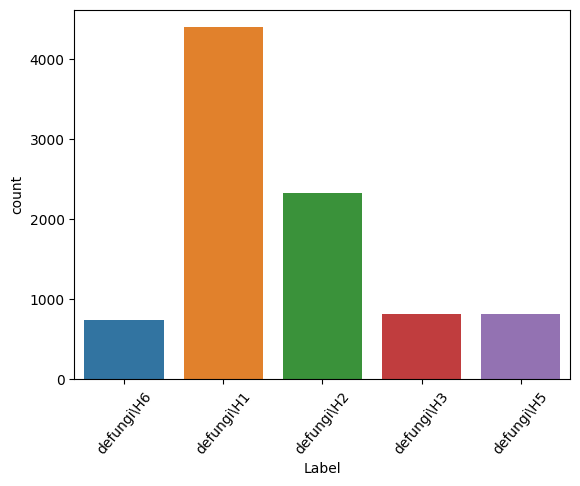

In [4]:
sns.countplot(x = dataframe["Label"])
plotter.xticks(rotation = 50);

In [5]:
train_data_dir =image_data
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 9114 files belonging to 5 classes.
Using 7292 files for training.
Found 9114 files belonging to 5 classes.
Using 1822 files for validation.


In [6]:
class_names = train.class_names
class_names

['H1', 'H2', 'H3', 'H5', 'H6']

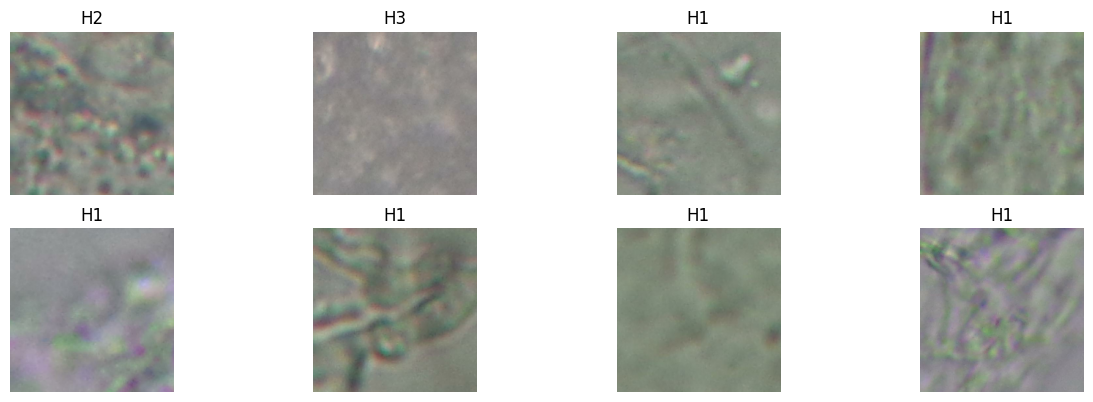

In [7]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [8]:
base_model = tf.keras.applications.MobileNetV3Small(input_shape=(224,224,3),include_top=False,weights='imagenet')
base_model.trainable = False
keras_model=keras.models.Sequential()
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten()) 
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(5,activation=tf.nn.softmax))
keras_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3small (Function  (None, 7, 7, 576)         939120    
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dropout (Dropout)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 5)                 141125    
                                                                 
Total params: 1080245 (4.12 MB)
Trainable params: 141125 (551.27 KB)
Non-trainable params: 939120 (3.58 MB)
_________________________________________________________________


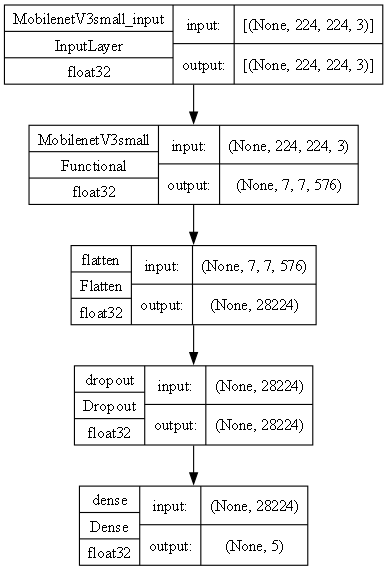

In [9]:
tf.keras.utils.plot_model(keras_model, to_file='model.png', show_shapes=True, show_layer_names=True,show_dtype=True,dpi=80)

In [10]:
checkpoint =ModelCheckpoint("my_keras_model.h5", save_best_only=True)

In [11]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [12]:
keras_model.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit_generator(train,epochs=15,validation_data=validation,callbacks=[checkpoint,early_stopping])

Epoch 1/15
228/228 [==============================] - 66s 278ms/step - loss: 1.5921 - accuracy: 0.6022 - val_loss: 0.6971 - val_accuracy: 0.7772
Epoch 2/15
228/228 [==============================] - 56s 244ms/step - loss: 0.9024 - accuracy: 0.7482 - val_loss: 0.5241 - val_accuracy: 0.8337
Epoch 3/15
228/228 [==============================] - 55s 242ms/step - loss: 0.7132 - accuracy: 0.7944 - val_loss: 0.4887 - val_accuracy: 0.8600
Epoch 4/15
228/228 [==============================] - 55s 241ms/step - loss: 0.6023 - accuracy: 0.8236 - val_loss: 0.4149 - val_accuracy: 0.8793
Epoch 5/15
228/228 [==============================] - 54s 238ms/step - loss: 0.5268 - accuracy: 0.8456 - val_loss: 0.4015 - val_accuracy: 0.8941
Epoch 6/15
228/228 [==============================] - 54s 237ms/step - loss: 0.5322 - accuracy: 0.8523 - val_loss: 0.3368 - val_accuracy: 0.9127
Epoch 7/15
228/228 [==============================] - 54s 237ms/step - loss: 0.5014 - accuracy: 0.8631 - val_loss: 0.5124 - val_ac

In [13]:
score, acc = keras_model.evaluate(validation)
print('Test Loss =', score)
print('Test Accuracy =', acc)

57/57 [==============================] - 11s 183ms/step - loss: 0.3368 - accuracy: 0.9127
Test Loss = 0.33675530552864075
Test Accuracy = 0.912733256816864


In [14]:
hist_=pd.DataFrame(hist.history)
hist_

,loss,accuracy,val_loss,val_accuracy
0,1.592066,0.602167,0.697103,0.777168
1,0.902394,0.748217,0.524124,0.833699
2,0.713158,0.794432,0.488686,0.860044
3,0.602286,0.823642,0.414899,0.879254
4,0.526828,0.845584,0.401545,0.894072
5,0.532245,0.852304,0.336755,0.912733
6,0.501407,0.863138,0.512435,0.858946
7,0.492560,0.872189,0.361253,0.917673
8,0.491883,0.877811,0.398068,0.923161
9,0.462552,0.877811,0.486235,0.894072


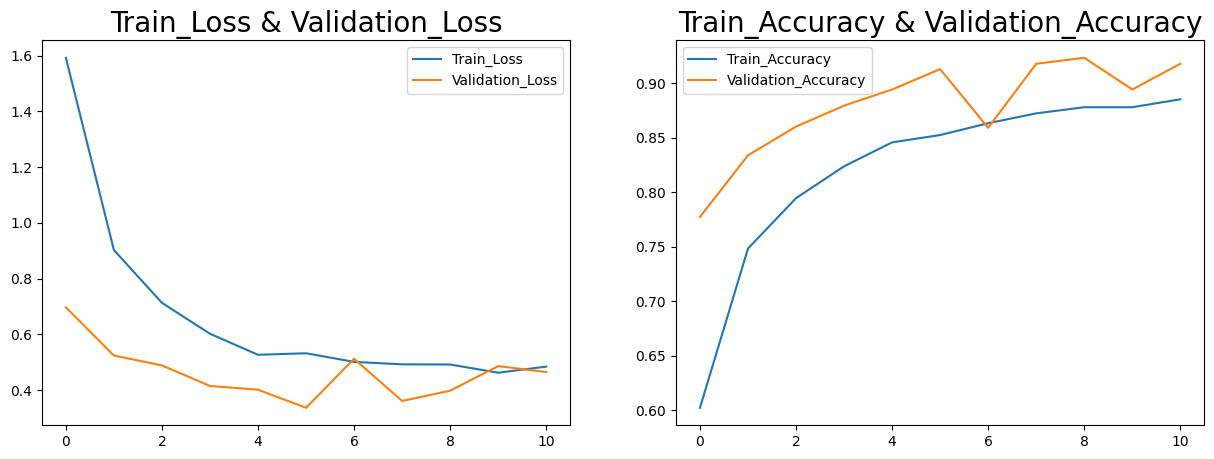

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [16]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=keras_model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

57/57 [==============================] - 10s 166ms/step


,Actual,Prediction
0,4,4
1,0,0
2,0,0
3,1,1
4,0,1
...,...,...
1817,0,0
1818,2,0
1819,0,0
1820,1,0


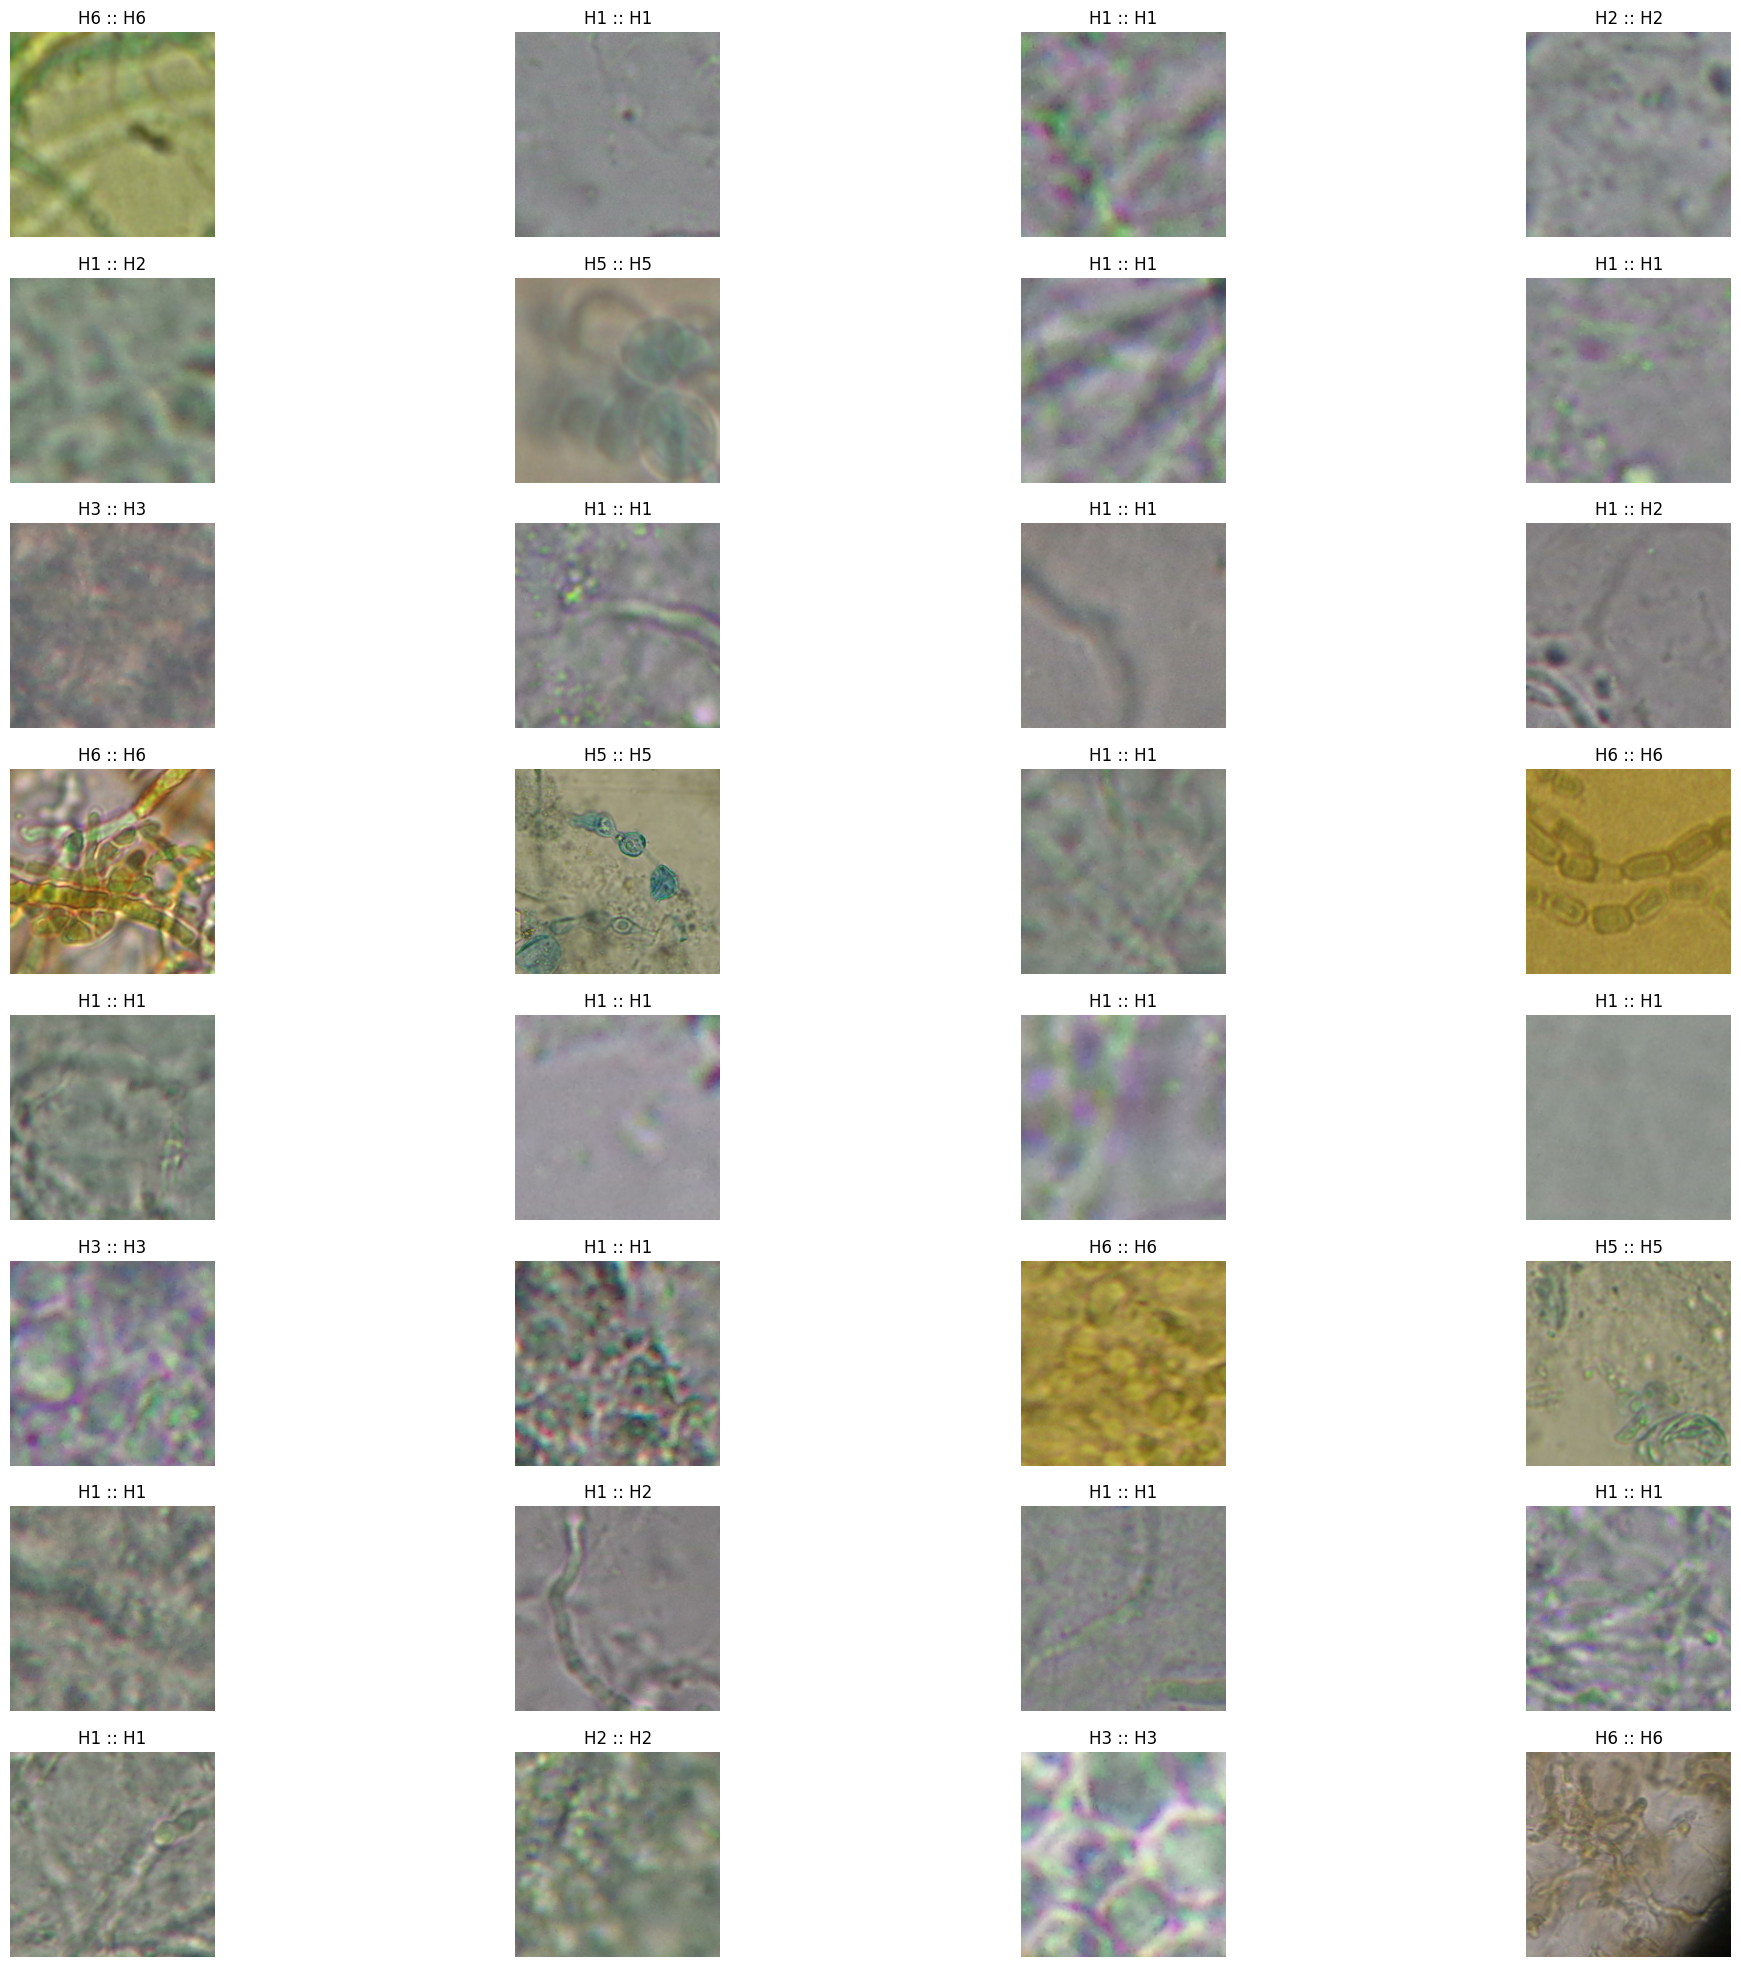

In [17]:
plt.figure(figsize=(25,25))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

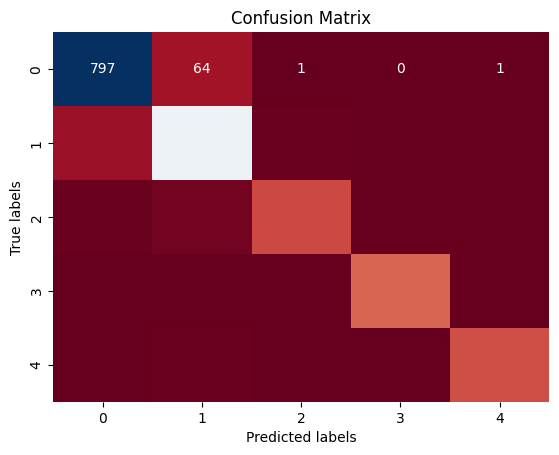

array([[797,  64,   1,   0,   1],
       [ 58, 422,   5,   2,   0],
       [  5,  14, 134,   0,   0],
       [  1,   1,   0, 167,   0],
       [  0,   6,   0,   1, 143]], dtype=int64)

In [18]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
plt.show()
CM

In [19]:
Acc = accuracy_score(y_val,y_pred)
print("accuracy is: {0:.3f}%".format(Acc * 100))

accuracy is: 91.273%
